In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [22]:
def preprocess_inputs(df):
    df = df.copy()



    if 'ID' in df.columns:
        df = df.drop('ID', axis=1)


    df = pd.get_dummies(df, columns=['EDUCATION', 'MARRIAGE'], prefix=['EDU', 'MAR'])


    y = df['default payment next month'].copy()
    X = df.drop('default payment next month', axis=1).copy()


    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    return X, y, scaler

In [23]:

file_path = "default of credit card clients.xls"
data = pd.read_excel(file_path, header=1, engine="xlrd")
X, y, scaler = preprocess_inputs(data)

In [24]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

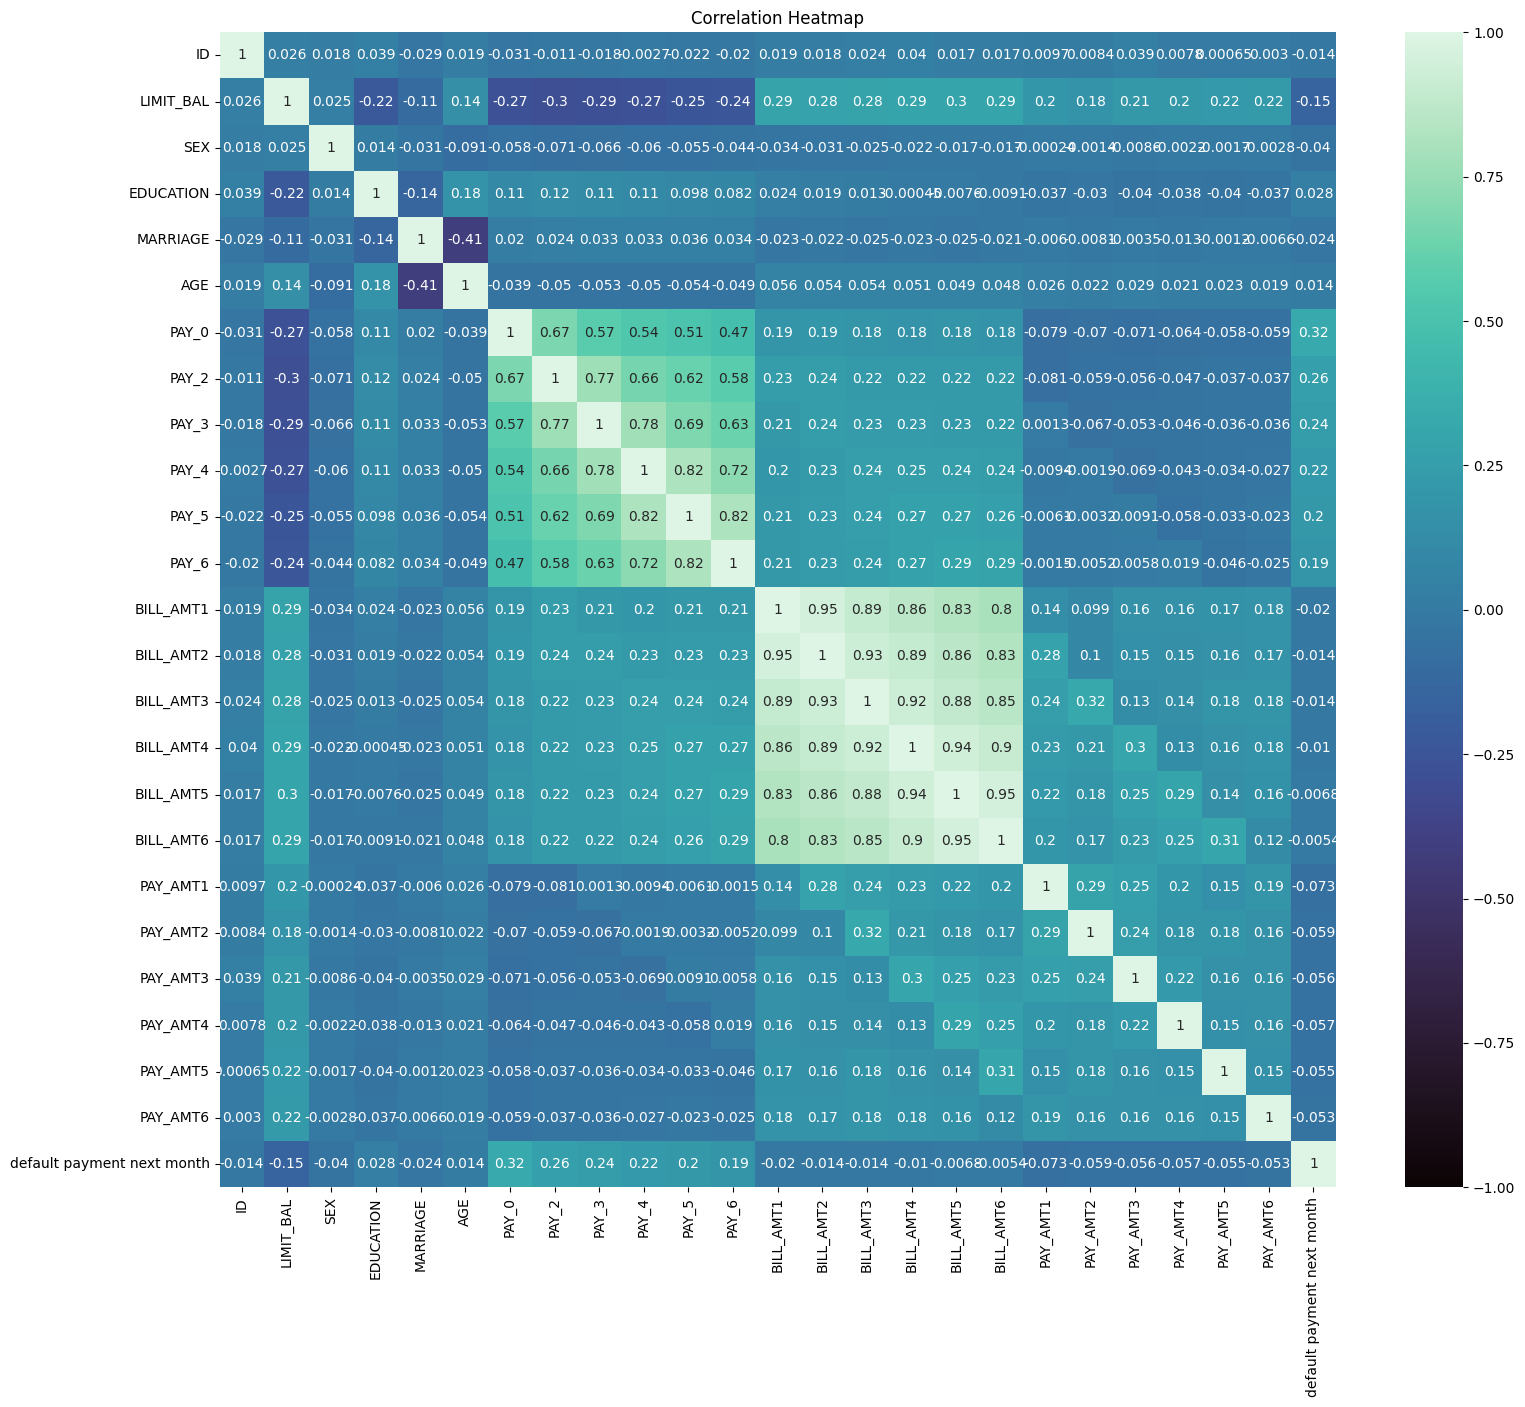

In [26]:

plt.figure(figsize=(18, 15))

corr = data.corr()
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [28]:

models = {
    LogisticRegression(max_iter=1000): "Logistic Regression",
    SVC(kernel='linear', probability=True): "Support Vector Machine",
    MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,)): "Neural Network"
}


In [ ]:

for model in models.keys():
    model.fit(X_train, y_train)

In [ ]:
predictions = {name: model.predict(X_test) for model, name in models.items()}

In [ ]:

results_df = pd.DataFrame({'Actual': y_test, **predictions})

In [ ]:

for model, name in models.items():
    if hasattr(model, 'predict_proba'):
        results_df[f'{name}_Probability'] = model.predict_proba(X_test)[:, 1]

In [ ]:


print("\nFirst 15 Predictions:")
print(results_df.head(15))


First 15 Predictions:
       Actual  Logistic Regression  Support Vector Machine  Neural Network  \
25665       0                    0                       0               0   
16464       0                    0                       0               0   
22386       1                    1                       1               1   
10149       1                    0                       0               0   
8729        0                    0                       0               0   
25295       0                    0                       0               0   
8876        0                    0                       0               0   
12348       0                    0                       0               0   
3858        0                    0                       0               0   
19209       0                    0                       0               0   
120         1                    1                       1               1   
12962       1                    0       

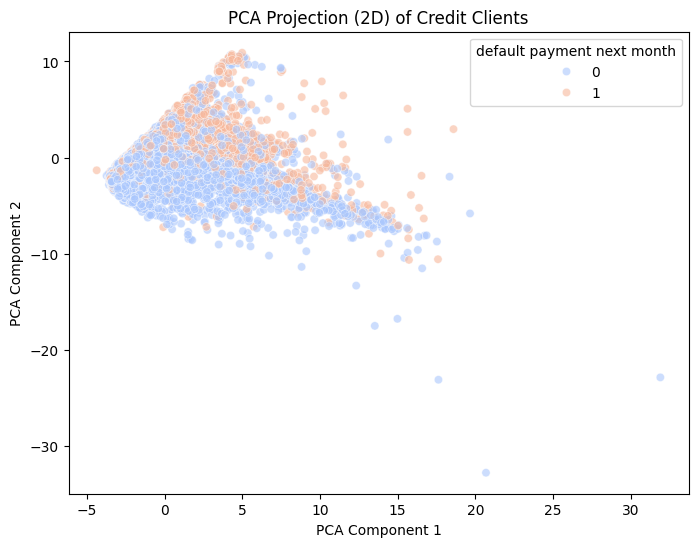

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.6)
plt.title('PCA Projection (2D) of Credit Clients')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:

results_df.to_csv('default_predictions.csv', index=False)
print("\nPredictions saved to 'default_predictions.csv'")


Predictions saved to 'default_predictions.csv'


In [ ]:


accuracies = {name: accuracy_score(y_test, pred) for name, pred in predictions.items()}
best_model_name = max(accuracies, key=accuracies.get)
best_model = [m for m, name in models.items() if name == best_model_name][0]

print(f"\nBest Model: {best_model_name} with accuracy {accuracies[best_model_name]:.2%}")


Best Model: Logistic Regression with accuracy 81.42%


In [ ]:


def predict_new_data(model, scaler, new_data):
    """Predict for new customer data"""
    new_data = new_data.reindex(columns=X.columns, fill_value=0)
    scaled_data = pd.DataFrame(scaler.transform(new_data), columns=X.columns)
    prediction = model.predict(scaled_data)[0]
    probability = model.predict_proba(scaled_data)[0][1] if hasattr(model, 'predict_proba') else None
    return prediction, probability

In [ ]:

new_customer = pd.DataFrame({
    'LIMIT_BAL': [2000],
    'SEX': [2],
    'AGE': [24],
    'PAY_0': [2],
    'PAY_2': [2],
    'PAY_3': [-1],
    'PAY_4': [-1],
    'PAY_5': [-2],
    'PAY_6': [-2],
    'BILL_AMT1': [3913],
    'BILL_AMT2': [3102],
    'BILL_AMT3': [689],
    'BILL_AMT4': [0],
    'BILL_AMT5': [0],
    'BILL_AMT6': [0],
    'PAY_AMT1': [0],
    'PAY_AMT2': [689],
    'PAY_AMT3': [0],
    'PAY_AMT4': [0],
    'PAY_AMT5': [0],
    'PAY_AMT6': [0],
    'EDU_1': [2],
    'EDU_2': [2],
    'EDU_3': [2],
    'MAR_1': [1],
    'MAR_2': [1],
    'MAR_3': [1]
})


In [ ]:

pred, prob = predict_new_data(best_model, scaler, new_customer)

In [ ]:
print(f"\nNew Customer Prediction:")
print(f"Will Default: {'Yes' if pred == 1 else 'No'}")
print(f"Probability: {prob:.2%} (if available)")



New Customer Prediction:
Will Default: Yes
Probability: 53.29% (if available)
